# Project Python Foundations:  FoodHub Data Analysis 


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('H:/Cursos/Data Science/Soluciones/M1Food Hub/foodhub_order.csv')
# In excel archives use pd.read_excel("name.xlsx",sheet_name="sheet1")
# To see the info  write at  the final ", sep= then" shift + tab to see
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### 2. rows and columns are present in the data

In [3]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
Observations:
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### 3. Datatypes of the different columns in the dataset

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:Based on the provided DataFrame summary:

* The DataFrame consists of 1898 entries, indexed from 0 to 1897.
* There are 9 columns in total.
* The DataFrame provides information about orders, customers, restaurants, cuisine types, costs, day of the week, ratings, food preparation time, and delivery time.
* Further analysis could involve exploring relationships between variables, such as the relationship between rating and delivery time or the distribution of costs across different cuisine types.

### 4.  Are there any missing values in the data? If yes, treat them using an appropriate method.

In [5]:
# Checking for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There is not missing values in the data

### 5. Statistical summary of the data. 

In [6]:
# Write your code here# Define a custom formatting function
def thousand_separator(x):
    return "{:,.3f}".format(x)
# get the summary statistics of the numerical data
#to test df.describe(include= "all")
df.describe().T.round(3).style.format(thousand_separator)

,count,mean,std,min,25%,50%,75%,max
order_id,"1,898.000","1,477,495.500",548.050,"1,476,547.000","1,477,021.250","1,477,495.500","1,477,969.750","1,478,444.000"
customer_id,"1,898.000","171,168.478","113,698.140","1,311.000","77,787.750","128,600.000","270,525.000","405,334.000"
cost_of_the_order,"1,898.000",16.499,7.484,4.470,12.080,14.140,22.298,35.410
food_preparation_time,"1,898.000",27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,"1,898.000",24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations: From the provided summary statistics table:

##### Order Count: 
* There are 1,898 orders in total.
##### Cost of the Order:
* The average cost of an order is approximately 16.50 usd.
* The standard deviation is approximately 7.48usd, indicating variability in the cost of orders.
* The minimum cost of an order is 4.47usd, while the maximum cost is 35.41usd.
* The majority of orders fall within the range of 12.08 usd to 22.30usd (25th to 75th percentile).
##### Food Preparation Time:
* The average food preparation time is approximately 27.37 minutes.
* The standard deviation is approximately 4.63 minutes.
* The minimum preparation time is 20 minutes, and the maximum is 35 minutes.
* Most orders are prepared within 23 to 31 minutes (25th to 75th percentile).
##### Delivery Time:
* The average delivery time is approximately 24.16 minutes.
* The standard deviation is approximately 4.97 minutes.
* The minimum delivery time is 15 minutes, and the maximum is 33 minutes.
* Delivery times range from 20 to 28 minutes for the majority of orders (25th to 75th percentile).

### 6. Orders  not rated

In [7]:
# Write the code here
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
* There are   736 orders no rated.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### 1. Order

In [8]:
# check unique order ID
df['order_id'].nunique()

1898

#### Observations:
* There are 1898 unique orders. As mentioned earlier, 'order_id' is just an identifier for the orders

#### 2. Client

In [9]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### Observations:
* There are 1200 clients

#### 3. Restaurants

In [10]:
# check unique restaurant
df['restaurant_name'].nunique()


178

#### Observations:
* There are 178 restaurants

In [11]:
# Get the count of observations for each restaurant name
restaurant_counts = df['restaurant_name'].value_counts()

# Calculate the total count of observations
total_count = restaurant_counts.sum()

# Calculate the percentage of each restaurant's count
restaurant_percentage = (restaurant_counts / total_count) * 100

# Create a new DataFrame to store the counts and percentages
restaurant_summary = pd.DataFrame({'Count': restaurant_counts, 'Percentage': restaurant_percentage})

# Display the DataFrame
print(restaurant_summary)

                           Count  Percentage
restaurant_name                             
Shake Shack                  219   11.538462
The Meatball Shop            132    6.954689
Blue Ribbon Sushi            119    6.269758
Blue Ribbon Fried Chicken     96    5.057956
Parm                          68    3.582719
...                          ...         ...
Sushi Choshi                   1    0.052687
Dos Caminos Soho               1    0.052687
La Follia                      1    0.052687
Philippe Chow                  1    0.052687
'wichcraft                     1    0.052687

[178 rows x 2 columns]


In [12]:
# sum % top 5
(df["restaurant_name"].value_counts().head()/df.shape[0]).sum()

0.33403582718651215

#### Observations:
* Shake Shack reciebed 219 orders 11.53% of the total.
* Top 5 popular restaurants that have received the highest number of orders **'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken' and 'Parm'**. 

* Almost 33% of the orders in the dataset are from these restaurants.

## ABC ANALYSIS

### A. ABC ANALYSIS BY ORDER COUNT

In [13]:
# Get the count of observations for each restaurant name
restaurant_counts = df['restaurant_name'].value_counts()

# Calculate the percentage of counts
restaurant_percentage = (restaurant_counts / restaurant_counts.sum()) * 100

# Format count values to include the percentage
restaurant_counts_with_percent = restaurant_counts.astype(str) + ' (' + restaurant_percentage.round(2).astype(str) + '%)'

# Rank the restaurants based on the count of observations using ABC method
restaurant_ranks = pd.qcut(restaurant_counts, q=[0, 0.8, 0.95, 1], labels=['C', 'B', 'A'])

# Create a new DataFrame to store the counts, percentage, and ABC ranks
restaurant_summary = pd.DataFrame({'Count': restaurant_counts, 'Percentage': restaurant_percentage, 'ABC Rank': restaurant_ranks})
# Display the DataFrame
#with pd.option_context('display.max_rows', None):
    #print(restaurant_summary)
# Format the DataFrame for display
styled_table = restaurant_summary.style.format({
    'Percentage': '{:.2f}%'
}).set_properties(**{'text-align': 'center'})

# Display the styled table
styled_table

,Count,Percentage,ABC Rank
restaurant_name,,,
Shake Shack,219,11.54%,A
The Meatball Shop,132,6.95%,A
Blue Ribbon Sushi,119,6.27%,A
Blue Ribbon Fried Chicken,96,5.06%,A
Parm,68,3.58%,A
RedFarm Broadway,59,3.11%,A
RedFarm Hudson,55,2.90%,A
TAO,49,2.58%,A
Han Dynasty,46,2.42%,A


In [14]:
# Get the count of observations for each restaurant name
restaurant_counts = df['restaurant_name'].value_counts()

# Calculate the percentage of counts
restaurant_percentage = (restaurant_counts / restaurant_counts.sum()) * 100

# Rank the restaurants based on the count of observations using ABC method
restaurant_ranks = pd.qcut(restaurant_counts, q=[0, 0.8, 0.95, 1], labels=['C', 'B', 'A'])

# Create a new DataFrame to store the counts, percentage, and ABC ranks
restaurant_summary = pd.DataFrame({'Count': restaurant_counts, 'Percentage': restaurant_percentage, 'ABC Rank': restaurant_ranks})

# Calculate the percentage of A, B, and C restaurants
abc_percentage = restaurant_summary['ABC Rank'].value_counts(normalize=True) * 100

# Calculate the counts of A, B, and C restaurants
abc_counts = restaurant_summary['ABC Rank'].value_counts()

# Create a new DataFrame to store the counts, percentage, and counts of A, B, and C restaurants
abc_summary_table = pd.DataFrame({'Count': abc_counts, 'Percentage': abc_percentage})

# Display the DataFrame
#with pd.option_context('display.max_rows', None):
    #print(abc_summary_table)
    
# Format the DataFrame for display
styled_table = abc_summary_table.style.format({
    'Percentage': '{:.2f}%'
}).set_properties(**{'text-align': 'center'})

# Display the styled table
styled_table

,Count,Percentage
ABC Rank,,
C,143,80.34%
B,26,14.61%
A,9,5.06%


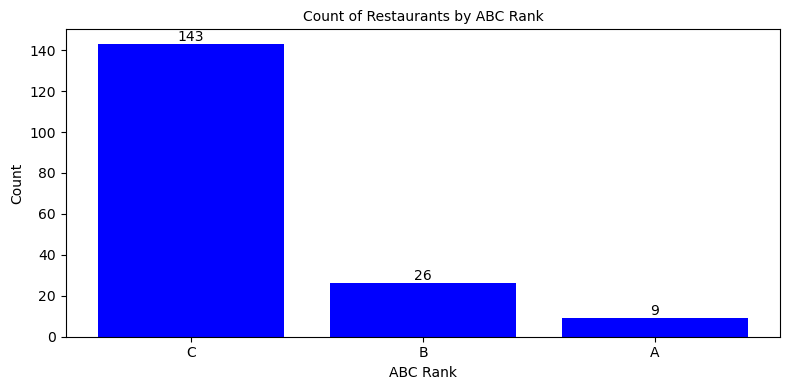

In [15]:
# Create a bar chart of the count column with numeric detail displayed
plt.figure(figsize=(8, 4))
bars = plt.bar(abc_summary_table.index, abc_summary_table['Count'], color='blue')

# Add count values as annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.title('Count of Restaurants by ABC Rank', fontsize=10)
plt.xlabel('ABC Rank')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
# Filter the restaurant_summary DataFrame to get only "A" ranked restaurants
a_restaurants = restaurant_summary[restaurant_summary['ABC Rank'] == 'A']

# Display the list of "A" ranked restaurants
print(a_restaurants)

                           Count  Percentage ABC Rank
restaurant_name                                      
Shake Shack                  219   11.538462        A
The Meatball Shop            132    6.954689        A
Blue Ribbon Sushi            119    6.269758        A
Blue Ribbon Fried Chicken     96    5.057956        A
Parm                          68    3.582719        A
RedFarm Broadway              59    3.108535        A
RedFarm Hudson                55    2.897787        A
TAO                           49    2.581665        A
Han Dynasty                   46    2.423604        A


### B. ABC ANALYSIS BY cost_of_the_order

In [17]:
# Summarize the cost by restaurant
restaurant_costs = df.groupby('restaurant_name')['cost_of_the_order'].sum()

# Calculate the percentage of costs
restaurant_percentage = (restaurant_costs / restaurant_costs.sum()) * 100

# Format count values to include the percentage
restaurant_costs_with_percent = restaurant_costs.astype(str) + ' (' + restaurant_percentage.round(2).astype(str) + '%)'

# Rank the restaurants based on the cost of orders using ABC method
restaurant_ranks = pd.qcut(restaurant_costs, q=[0, 0.8, 0.95, 1], labels=['C', 'B', 'A'])

# Create a new DataFrame to store the costs, percentage, and ABC ranks
restaurant_summary = pd.DataFrame({'Total Cost': restaurant_costs, 'Percentage': restaurant_percentage, 'ABC Rank': restaurant_ranks})

# Sort the DataFrame by ABC Rank in descending order
restaurant_summary = restaurant_summary.sort_values(by='Total Cost', ascending=False)

# Format the DataFrame for display
styled_table = restaurant_summary.style.format({
    'Percentage': '{:.2f}%'
}).set_properties(**{'text-align': 'center'})

# Display the styled table
styled_table

,Total Cost,Percentage,ABC Rank
restaurant_name,,,
Shake Shack,3579.530000,11.43%,A
The Meatball Shop,2145.210000,6.85%,A
Blue Ribbon Sushi,1903.950000,6.08%,A
Blue Ribbon Fried Chicken,1662.290000,5.31%,A
Parm,1112.760000,3.55%,A
RedFarm Broadway,965.130000,3.08%,A
RedFarm Hudson,921.210000,2.94%,A
TAO,834.500000,2.66%,A
Han Dynasty,755.290000,2.41%,A


In [18]:
# Group the restaurant_summary DataFrame by ABC Rank and calculate the sum of Total Cost for each rank category
summary_by_rank = restaurant_summary.groupby('ABC Rank')['Total Cost'].sum()

# Calculate the percentage of total cost for each rank category
percentage_by_rank = (summary_by_rank / summary_by_rank.sum()) * 100

# Create a new DataFrame to store the summarized cost by rank category
summary_table = pd.DataFrame({'Total Cost': summary_by_rank, 'Percentage': percentage_by_rank})

# Sort the summary_table DataFrame by Total Cost in descending order
summary_table_sorted = summary_table.sort_values(by='Total Cost', ascending=False)

# Format the DataFrame for display
styled_summary_table = summary_table_sorted.style.format({
    'Percentage': '{:.2f}%'
}).set_properties(**{'text-align': 'center'}).set_table_styles([{
    'selector': 'thead',
    'props': [('text-align', 'center')]
}])

# Display the styled summary table
styled_summary_table

,Total Cost,Percentage
ABC Rank,,
A,13879.870000,44.32%
B,10063.650000,32.14%
C,7371.300000,23.54%


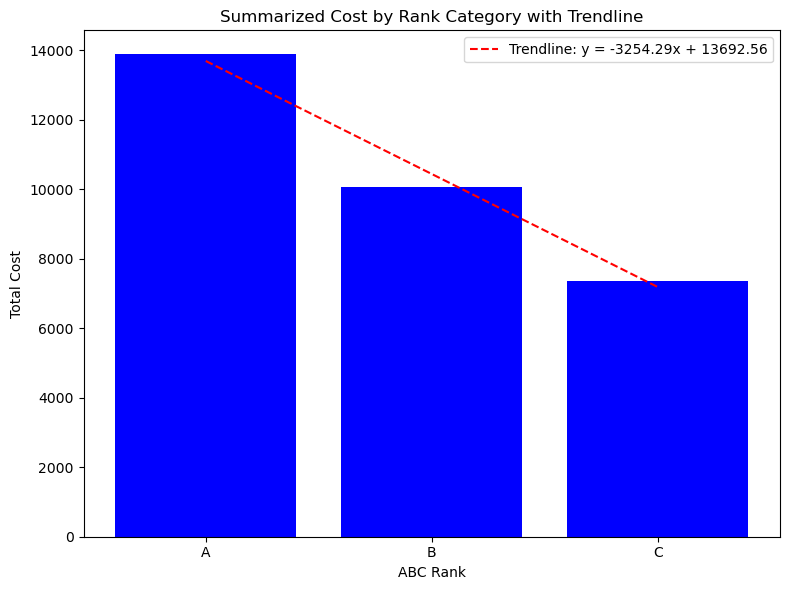

In [19]:
from scipy import stats

# Plotting the summarized cost by rank category
plt.figure(figsize=(8, 6))
bars = plt.bar(summary_table_sorted.index, summary_table_sorted['Total Cost'], color='blue')

# Fit a linear regression model
x = np.arange(len(summary_table_sorted))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, summary_table_sorted['Total Cost'])
trendline = slope * x + intercept

# Plot the trendline
plt.plot(x, trendline, color='red', linestyle='--', label=f'Trendline: y = {slope:.2f}x + {intercept:.2f}')

plt.title('Summarized Cost by Rank Category with Trendline')
plt.xlabel('ABC Rank')
plt.ylabel('Total Cost')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

#### 4. Cuisine type 

In [20]:
# check unique cuisine type
df['cuisine_type'].nunique()

14

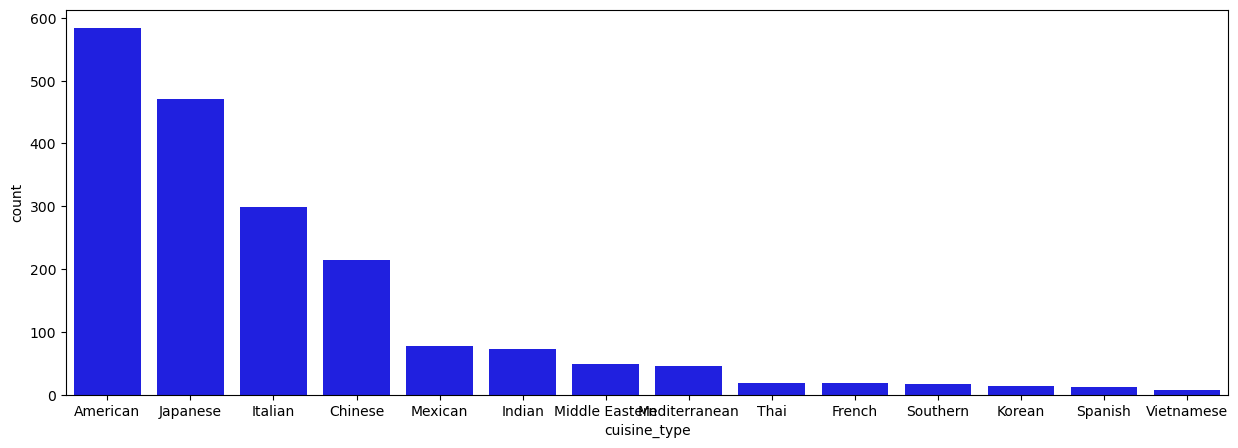

In [21]:
# Get the count of observations for each cuisine type
cuisine_counts = df['cuisine_type'].value_counts()

# Get the cuisine types sorted by count in descending order
cuisine_order = cuisine_counts.index

# Plot the count of observations for each cuisine type in descending order
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='cuisine_type', order=cuisine_order,color='blue')
plt.show()

#### Observations:
* Upon further analysis, it's evident that the dataset comprises 14 distinct cuisine types, with American cuisine standing out as the most prevalent choice among customers. 
* The most frequent cuisine type is American followed by Japanese and Italian.
* Vietnamese appears to be the least popular of all the cuisines.

#### 5. Cost of the order

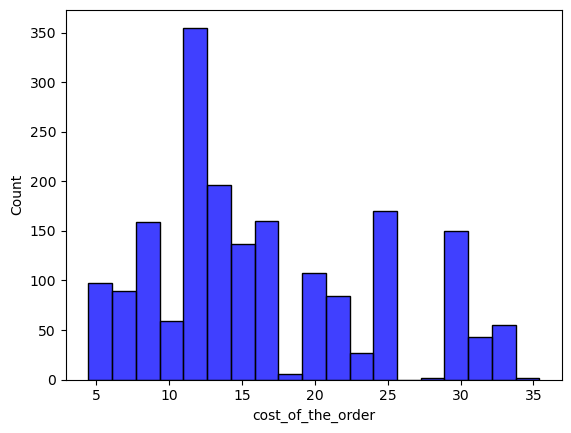

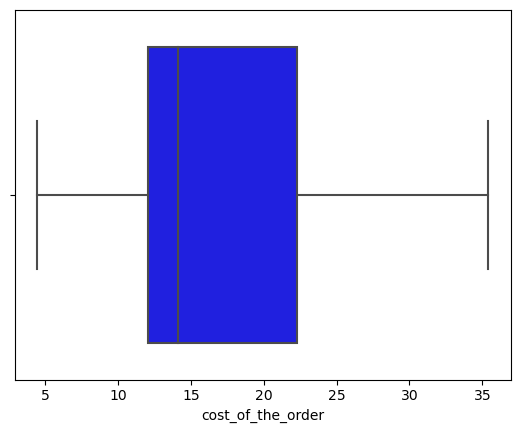

In [22]:
sns.histplot(data=df,x='cost_of_the_order', color='blue')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order', color='blue')
plt.show()

#### Observations:
* The mean cost of orders exceeds the median cost, suggesting a right-skewed distribution for order costs.
* The mode of the distribution highlights a significant preference for ordering food priced between 10 to 12 dollars.
* A limited number of orders surpass the 30-dollar mark, indicating potential purchases of higher-priced meals.

#### 6. Day of the week

In [23]:
# Get the count of observations for day_of_the_week
day_of_the_week_counts = df['day_of_the_week'].value_counts()
# Calculate the percentage of day_of_the_week
day_of_the_week_percentage = (day_of_the_week_counts / len(df)) * 100
# Create a new DataFrame to store the counts and percentages
day_of_the_week_summary = pd.DataFrame({'Count': day_of_the_week_counts, 'Percentage': day_of_the_week_percentage})
# Display the DataFrame
print(day_of_the_week_summary)

                 Count  Percentage
day_of_the_week                   
Weekend           1351    71.18019
Weekday            547    28.81981


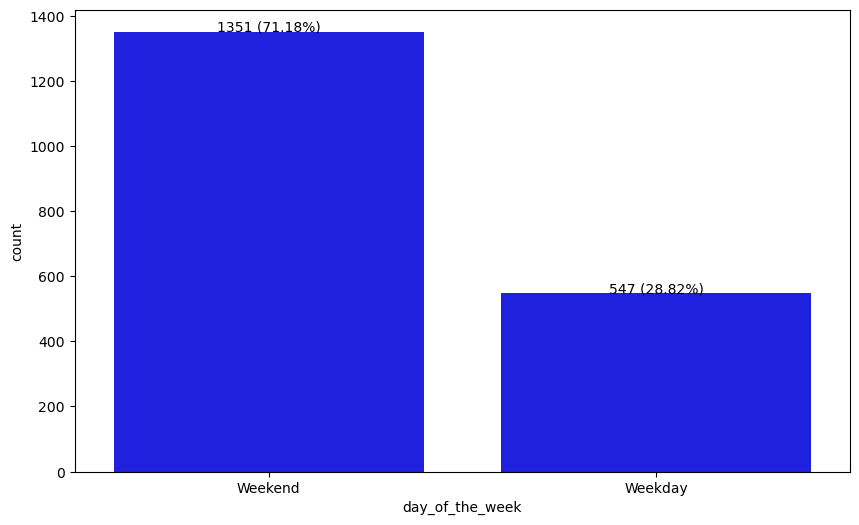

In [24]:
# Calculate the count and percentage of each category
day_counts = df['day_of_the_week'].value_counts()
day_percentage = (day_counts / len(df)) * 100

# Plot the count of observations for each day of the week
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='day_of_the_week', color='blue')

# Annotate the plot with both count and percentage
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{day_counts[i]} ({day_percentage[i]:.2f}%)', ha='center')

plt.show()

#### Observations:
* Weekend Orders: The count of orders during the weekend is significantly higher, with a total of 1351 orders, representing approximately 71.18% of the total orders in the dataset. This suggests a notable increase in food orders over weekends compared to weekdays.

* Weekday Orders: In contrast, orders placed during weekdays are comparatively lower, with a total of 547 orders, accounting for approximately 28.82% of the total orders. This indicates a relatively quieter period for food orders during weekdays compared to weekends.

#### 7. Rating

In [25]:
# check the unique values
df['rating'].value_counts()

# Get the count of observations for rating
rating_counts = df['rating'].value_counts()
# Calculate the percentage of day_of_the_week
rating_percentage = (rating_counts / len(df)) * 100
# Create a new DataFrame to store the counts and percentages
rating_summary = pd.DataFrame({'Count': rating_counts, 'Percentage': rating_percentage})
# Display the DataFrame
print(day_of_the_week_summary)

                 Count  Percentage
day_of_the_week                   
Weekend           1351    71.18019
Weekday            547    28.81981


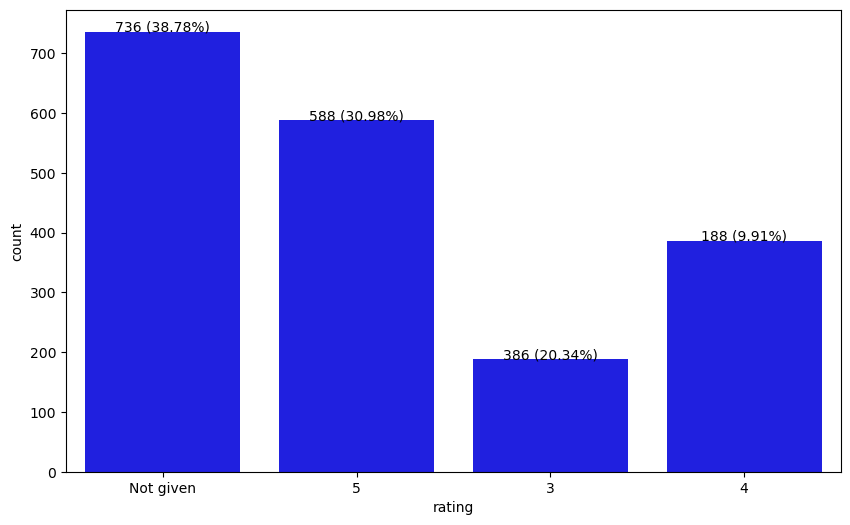

In [26]:
# Calculate the count and percentage of each category
day_counts = df['rating'].value_counts()
day_percentage = (day_counts / len(df)) * 100

# Plot the count of observations for each day of the week
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='rating',color='blue')

# Annotate the plot with both count and percentage
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{day_counts[i]} ({day_percentage[i]:.2f}%)', ha='center')

plt.show()

#### Observations:


* The rating distribution indicates that the most common rating category is 'not provided', with a subsequent prevalence of a rating of 5.

* Approximately 200 orders have received a rating of 3.

#### 8. Food Preparation time

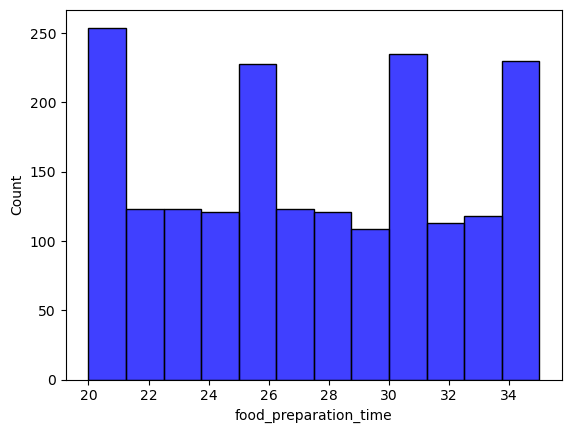

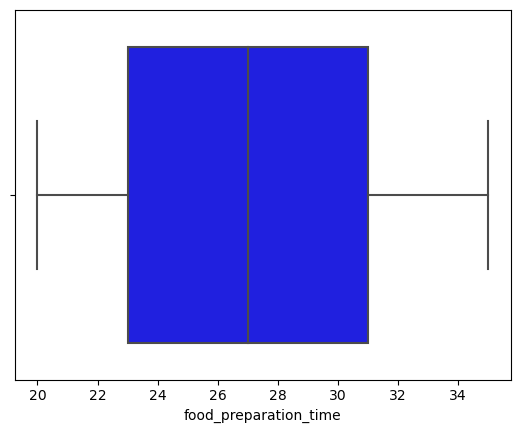

In [27]:
sns.histplot(data=df,x='food_preparation_time', color='blue')
plt.show()
sns.boxplot(data=df,x='food_preparation_time', color='blue')
plt.show()

#### 9. Delivery Time

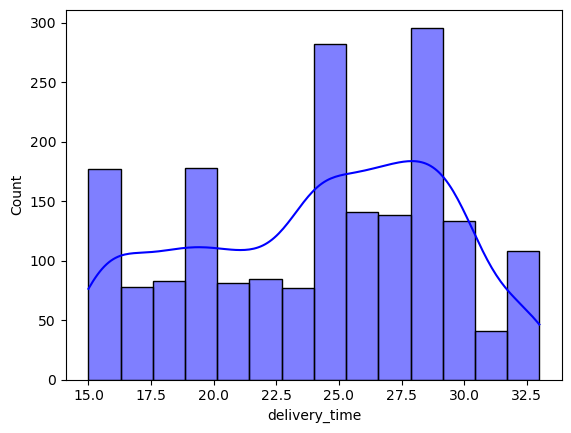

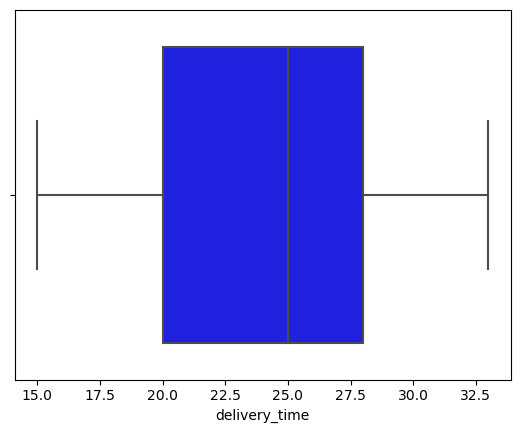

In [28]:
sns.histplot(data=df,x='delivery_time', color='blue', kde=True)
plt.show()
sns.boxplot(data=df,x='delivery_time', color='blue')
plt.show()

#### Observations:

* The average food preparation time is almost equal to the median food preparation time indicating that the distribution is nearly symmetrical.

* The food preparation time is pretty evenly distributed between 20 and 30 minutes.

* There are no outliers in this column.

#### Orders by day of the week and delivery time

In [29]:
df[["day_of_the_week", "delivery_time"]].groupby("day_of_the_week").agg(["min","mean", "median","max", "count", "std"])


delivery_time                                      
                          min       mean median max count       std
day_of_the_week                                                    
Weekday                    24  28.340037   28.0  33   547  2.891428
Weekend                    15  22.470022   22.0  30  1351  4.628938

#### Observations:

* The mean food preparation time closely aligns with the median food preparation time, suggesting a nearly symmetrical distribution.

* Food preparation time is evenly spread across the range of 20 to 35 minutes.

* No exceptional values are present in this column.

#### 10.Top 5 restaurants in terms of the number of orders received

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


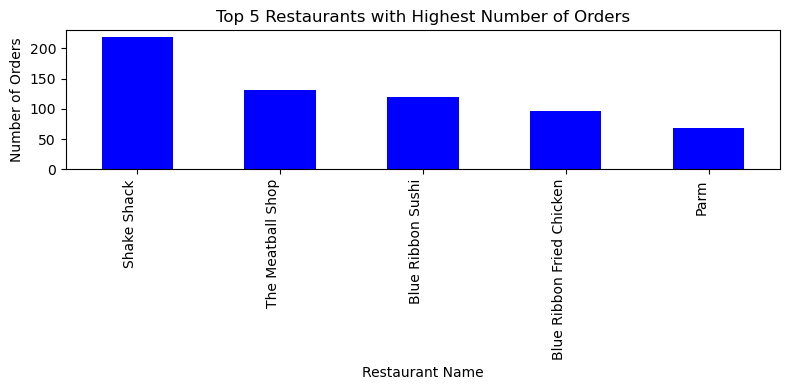

In [30]:
# Get top 5 restaurants with highest number of orders
top_restaurants = df['restaurant_name'].value_counts()[:5]
print(top_restaurants)

# Create a bar chart
plt.figure(figsize=(8, 4))
top_restaurants.plot(kind='bar', color='blue')
plt.title('Top 5 Restaurants with Highest Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#### Observations:


#### 11.The most popular cuisine on weekends

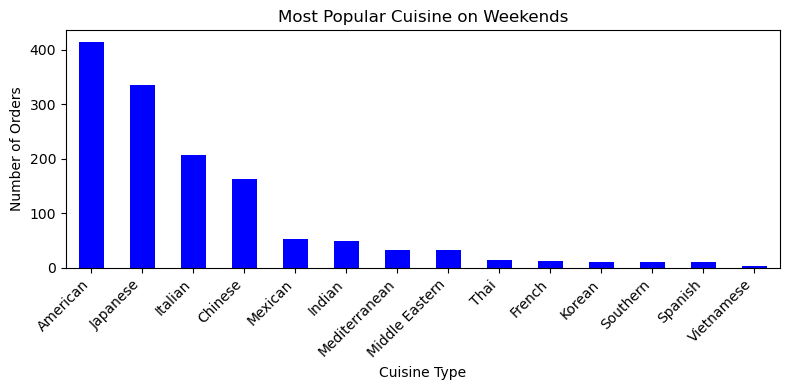

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

In [31]:

# Filter the DataFrame for weekend days and select the 'cuisine_type' column
most_popular_cuisine_on_weekends = df[df['day_of_the_week'].isin(['Weekend'])]['cuisine_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 4))
most_popular_cuisine_on_weekends.plot(kind='bar', color='blue')
plt.title('Most Popular Cuisine on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

#### Observations:


#### 12. percentage of the orders cost more than 20 dollars? [2 marks]

  cost_of_the_order  Count
0           [5, 10)    385
1          [10, 20)    949
2          [20, 30)    455
3          [30, 36)    100


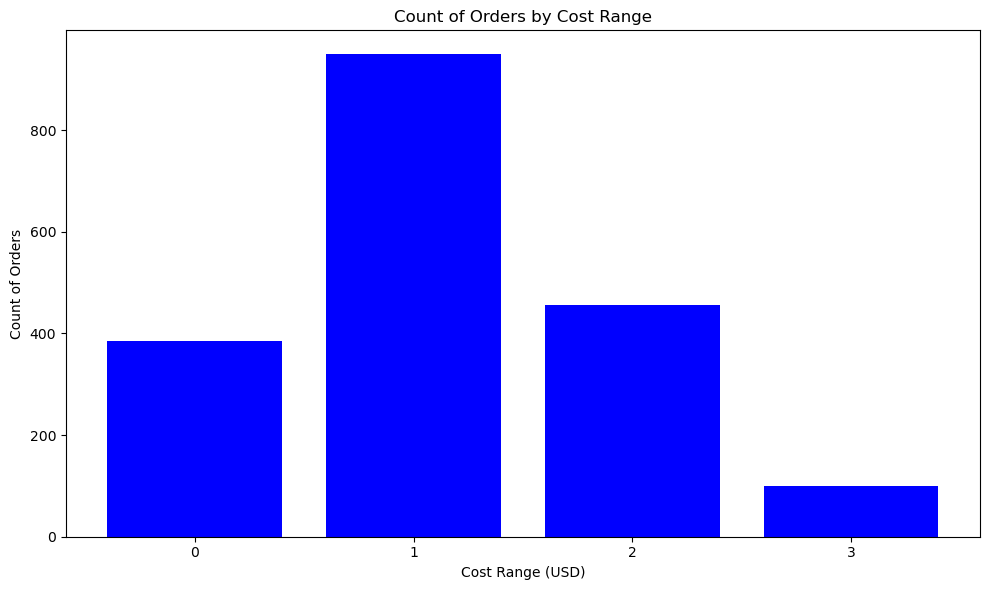

In [32]:
# Filter orders within the specified cost range
filtered_orders = df[(df['cost_of_the_order'] >= 5) & (df['cost_of_the_order'] <= 36)]

# Define cost ranges
cost_ranges = pd.cut(filtered_orders['cost_of_the_order'], bins=[5, 10, 20, 30, 36], include_lowest=True, right=False)

# Group by cost ranges and calculate the count of orders
orders_by_range = filtered_orders.groupby(cost_ranges).size().reset_index(name='Count')

# Create a table to display the count of orders in each range
print(orders_by_range)

# Plot a bar chart to visualize the count of orders in each range
plt.figure(figsize=(10, 6))
plt.bar(orders_by_range.index.astype(str), orders_by_range['Count'], color='blue')
plt.title('Count of Orders by Cost Range')
plt.xlabel('Cost Range (USD)')
plt.ylabel('Count of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [33]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the number of total orders where the cost is above 20 dollars

print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
* The number of total orders that cost above 20 dollars is: 555
* Percentage of orders above 20 dollars: 29.24 %

### 13. The mean order delivery time

  delivery_time  Count
0       [5, 10)      0
1      [10, 20)    428
2      [20, 30)   1188
3      [30, 36)    282


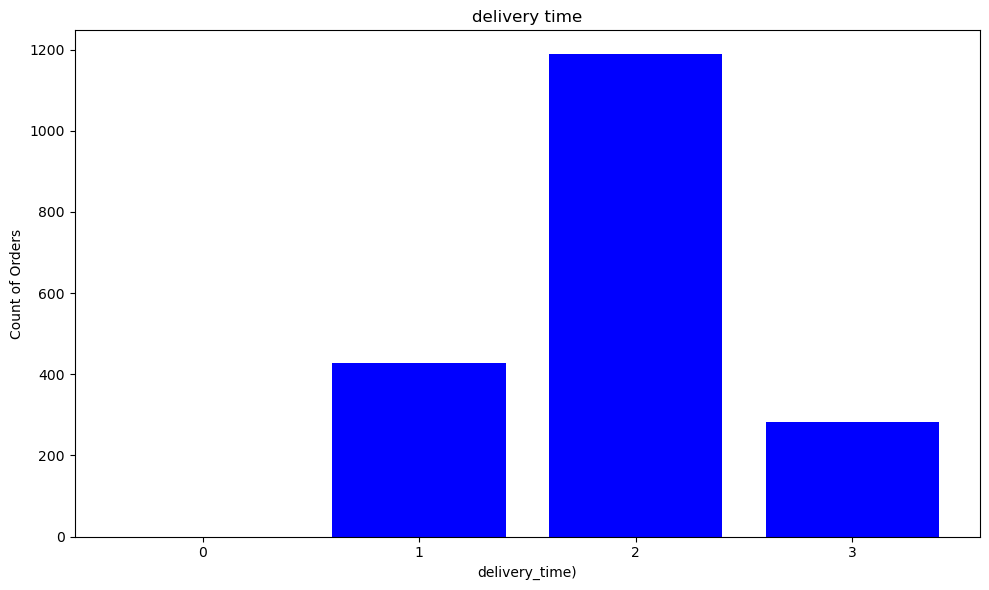

In [34]:
# Filter orders within the specified cost range
filtered_orders = df[(df['delivery_time'] >= 15) & (df['delivery_time'] <= 35)]

# Define cost ranges
cost_ranges = pd.cut(filtered_orders['delivery_time'], bins=[5, 10, 20, 30, 36], include_lowest=True, right=False)

# Group by cost ranges and calculate the count of orders
orders_by_range = filtered_orders.groupby(cost_ranges).size().reset_index(name='Count')

# Create a table to display the count of orders in each range
print(orders_by_range)

# Plot a bar chart to visualize the count of orders in each range
plt.figure(figsize=(10, 6))
plt.bar(orders_by_range.index.astype(str), orders_by_range['Count'], color='blue')
plt.title('delivery time')
plt.xlabel('delivery_time)')
plt.ylabel('Count of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [35]:
# The mean delivery time
print('The mean delivery time for this dataset is', round(df['delivery_time'].mean(), 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
* The mean delivery time for this dataset is 24.16 minutes


### 14. The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [36]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head() 

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64

#### Observations: 
* The cosumers 52832, 47440,  83287 will recieve 20% of discount:

# Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 


#### 1. Cuisine vs Cost of the order

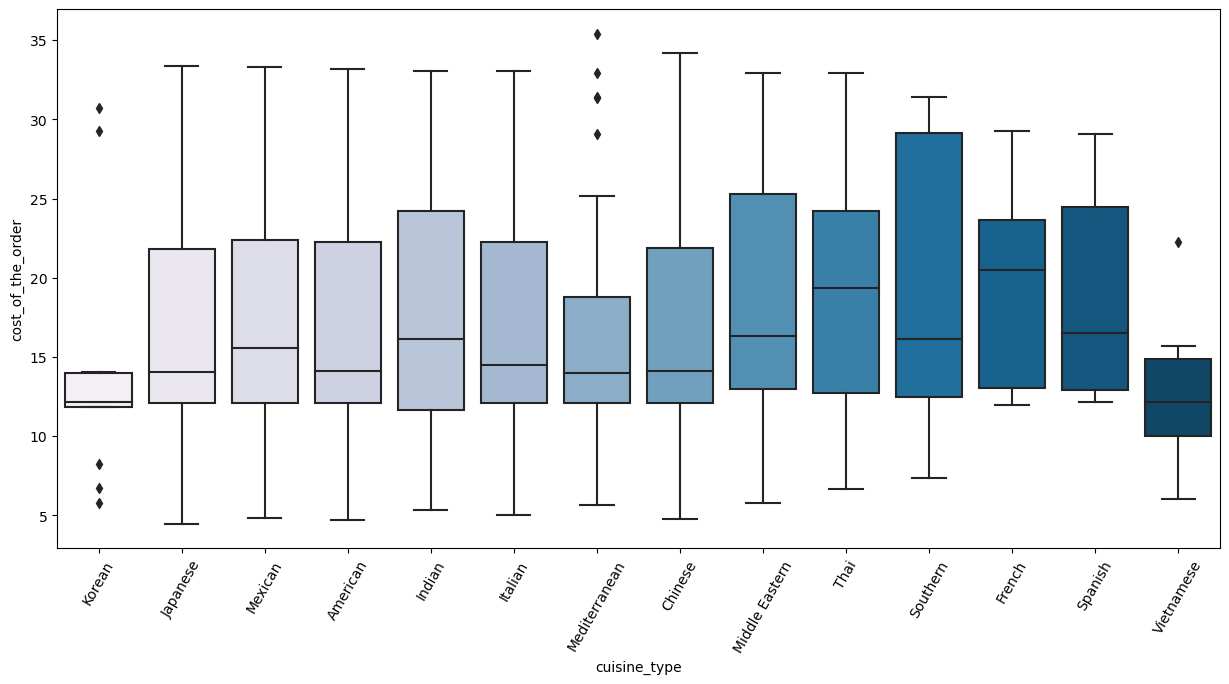

In [37]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* Vietnamese and Korean cuisines cost less compared to other cuisines.
* The boxplots for Italian, American, Chinese, Japanese cuisines are quite similar. This indicates that the quartile costs for these cuisines are quite similar.
* Outliers are present for the cost of Korean, Mediterranean and Vietnamese cuisines.
* French and Spanish cuisines are costlier compared to other cuisines.

#### 2. Cuisine vs Food Preparation time

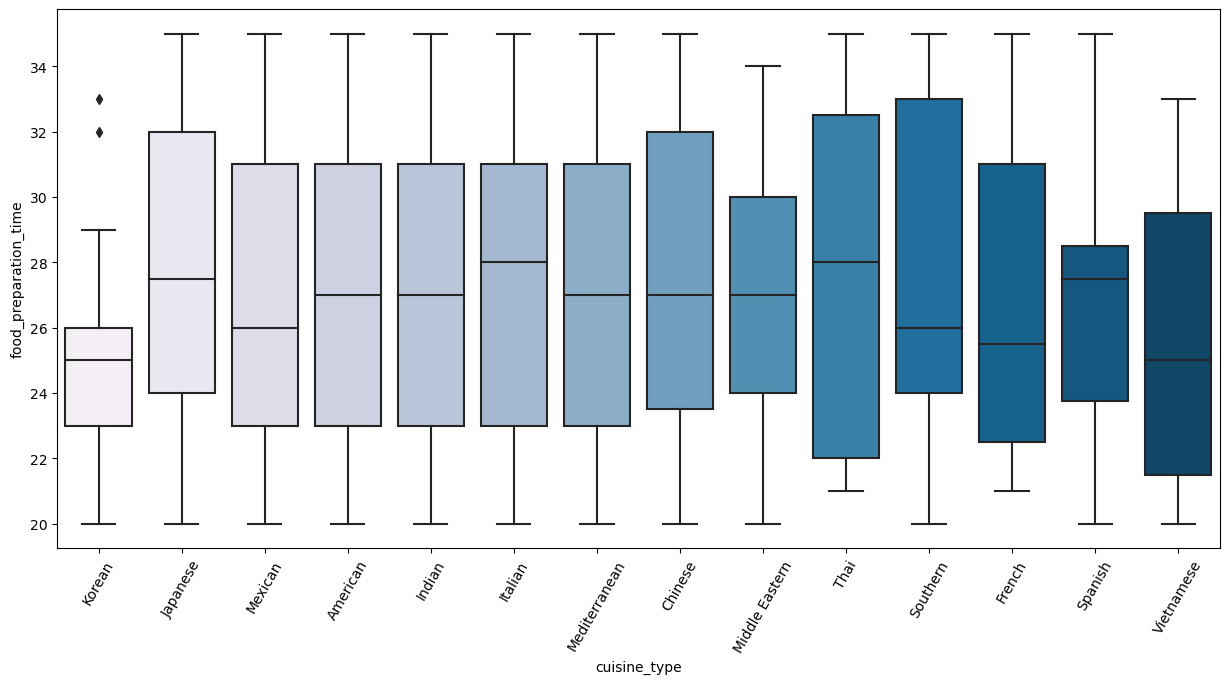

In [38]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* Food preparation time is very consistent for most of the cuisines. 
* The median food preparation time lies between 24 and 30 minutes for all the cuisines.
* Outliers are present for the food preparation time of Korean cuisine.
* Korean cuisine takes less time compared to the other cuisines.

#### 3. Day of the Week vs Delivery time

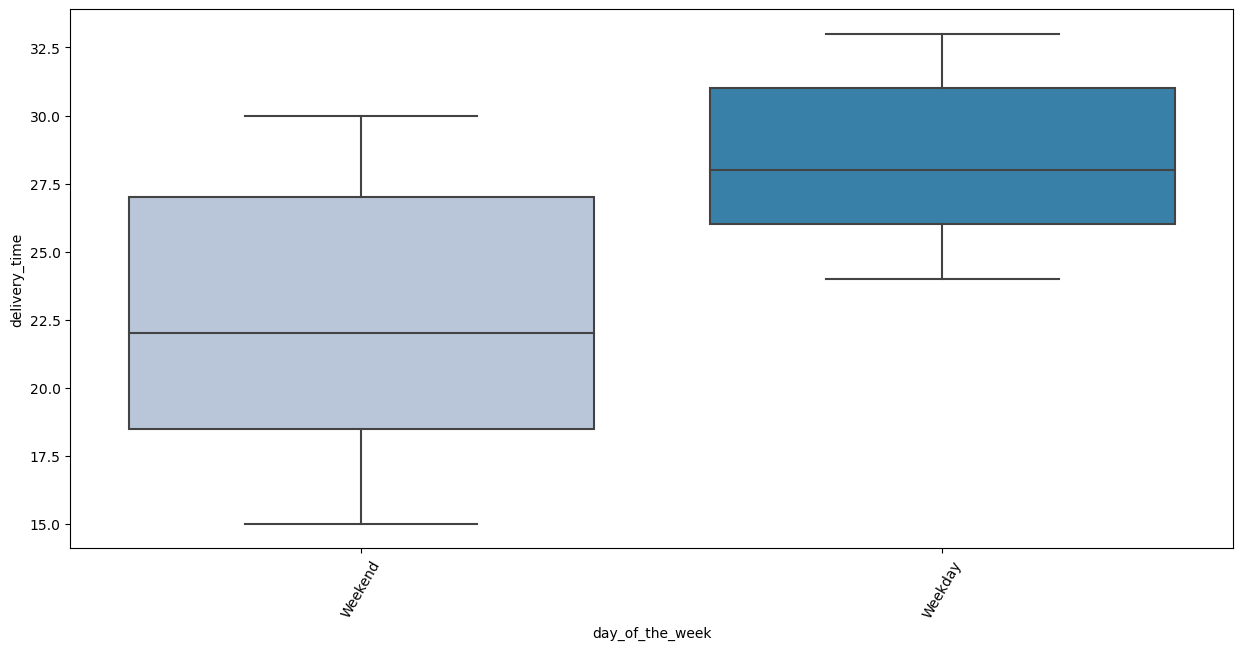

In [39]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

#### Observations:
*The delivery time for all the orders over the weekends is less compared to weekdays. This could be due to the dip in traffic over the weekends.

#### 4. Revenue generated by the restaurants

In [40]:
plt.figure(figsize = (15, 7))
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

<Figure size 1500x700 with 0 Axes>

#### Observations:

* The above 14 restaurants are generating more than 500 dollars revenue.

#### 5. Rating vs Delivery time

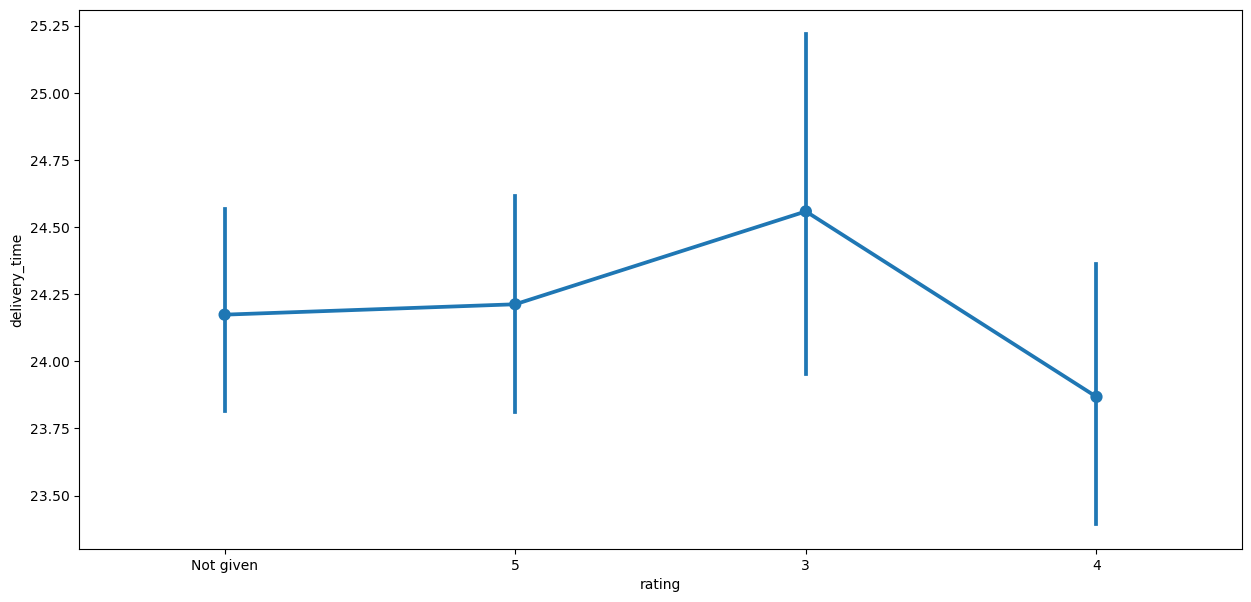

In [41]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations:

* It is possible that delivery time plays a role in the low-rating of the orders.


#### 6. Rating vs Food preparation time

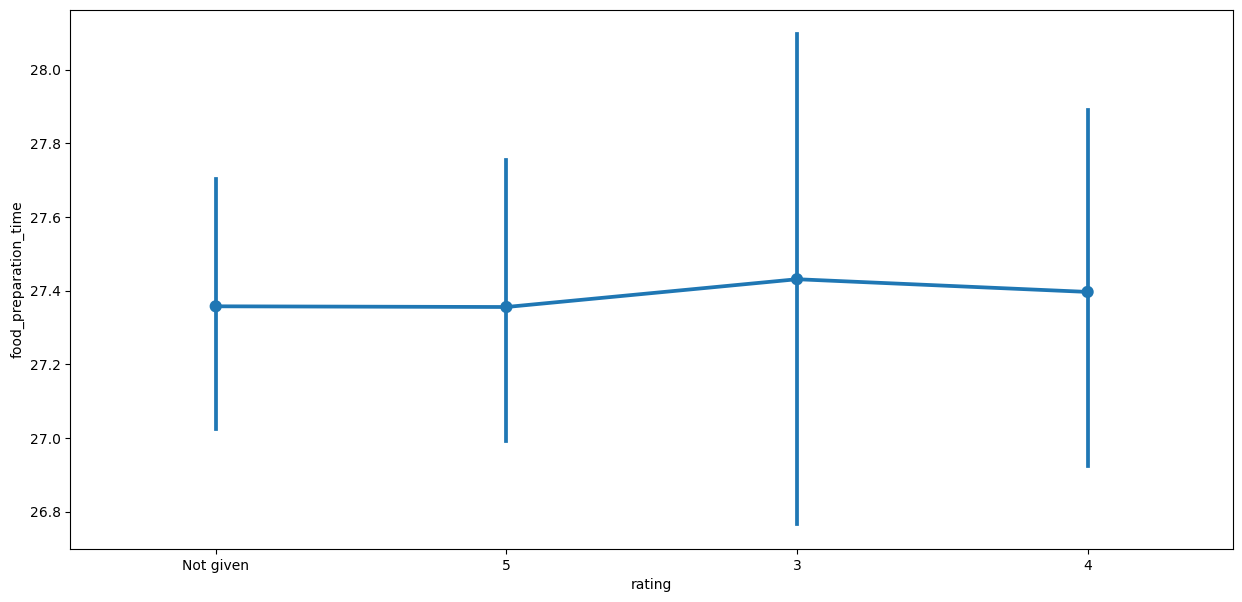

In [42]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Observations:

* It seems that food preparation time does not play a role in the low-rating of the orders.

#### 7.Rating vs Cost of the order

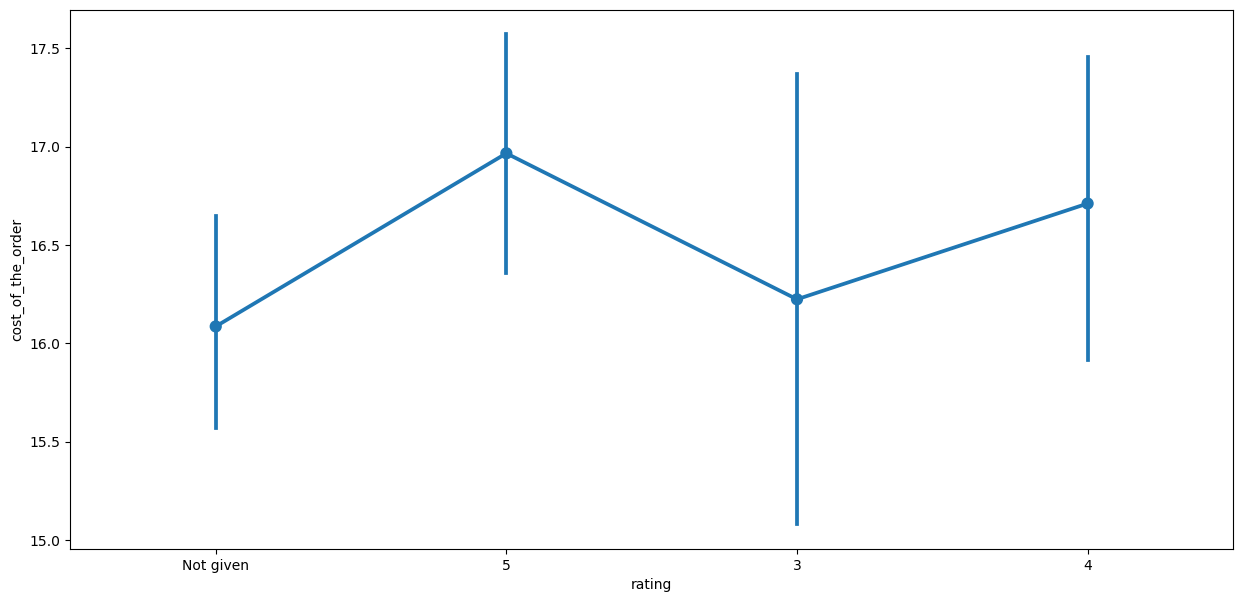

In [43]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#### Observations

* It seems that high-cost orders have been rated well and low-cost orders have not been rated.

### Correlation among variables

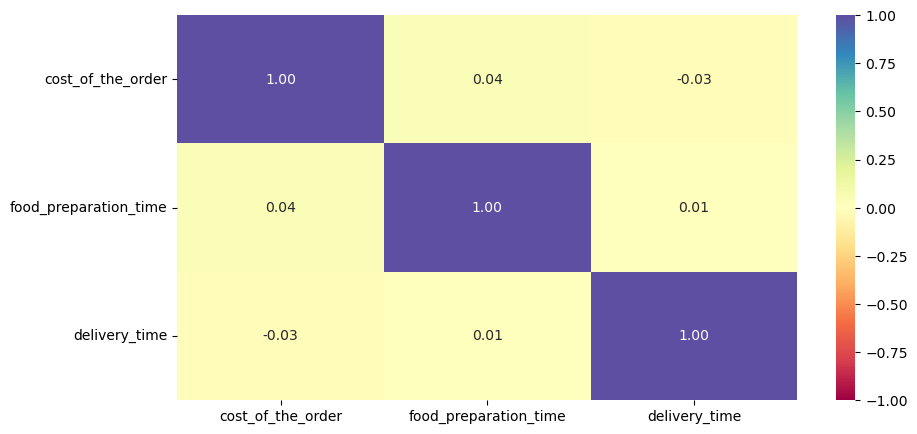

In [44]:

# plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10, 5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


#### Observations:

* There is no correlation between cost of the order, delivery time and food preparation time.


### Situations

#### 1. The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 

In [45]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [46]:
# get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
# filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# find the mean rating of the restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

* The restaurants fulfilling the criteria to get the promotional offer are: **'The Meatball Shop', 'Blue Ribbon Fried Chicken',  'Shake Shack' and 'Blue Ribbon Sushi'**.

#### Observations:


#### 2. The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [47]:
# Write the code here#function to determine the net revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [48]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:

* The net revenue generated on all the orders given in the dataset is around 6166.3 dollars.

### 3. The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [49]:
# add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# find the percentage of orders that have more than 60 minutes of total delivery time
print ('The percentage of orders that have more than 60 minutes of total delivery time is',
       round(df[df['total_time'] > 60].shape[0] / df.shape[0] * 100, 2),'%')

The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


#### Observations:

* Approximately 10.54 % of the total orders have more than 60 minutes of total delivery time.



### 4. The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [50]:
# get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes



#### Observations:

* The mean delivery time on weekdays is around 28 minutes whereas the mean delivery time on weekends is around 22 minutes.

* This could be due to the dip of traffic volume in the weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Approximately 80% of orders are for American, Japanese, Italian, and Chinese cuisines, indicating high popularity among FoodHub customers.
* Shake Shack stands out as the most favored restaurant, boasting the highest order count.
* Order volumes exhibit an uptick during weekends compared to weekdays.
* Delivery times during weekends are generally shorter than weekdays, possibly due to reduced traffic.
Roughly 39% of orders remain unrated.

### Recommendations:

* FoodHub should integrate with restaurants serving American, Japanese, Italian and Chinese cuisines as these cuisines are very popular among FoodHub customers.

* FoodHub should provide promotional offers to top-rated popular restaurants like Shake Shack that serve most of the orders.

* As the order volume is high during the weekends, more delivery persons should be employed during the weekends to ensure timely delivery of the order. Weekend promotional offers should be given to the customers to increase the food orders during weekends.

* Customer Rating is a very important factor to gauge customer satisfaction. The company should investigate the reason behind the low count of ratings. They can redesign the rating page in the app and make it more interactive to lure the customers to rate the order.

* Around 11% of the total orders have more than 60 minutes of total delivery time. FoodHub should try to minimize such instances in order to avoid customer dissatisfaction. They can provide some reward to the punctual delivery persons.

---